<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_ML_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import minmax_scale

In [2]:
wine = load_wine()
x=pd.DataFrame(wine.data, columns=wine.feature_names)
print(x)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [3]:
x.shape

(178, 13)

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
y=wine.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

##Sort

In [7]:
x.alcohol.sort_values()

115    11.03
113    11.41
120    11.45
110    11.46
121    11.56
       ...  
46     14.38
14     14.38
6      14.39
13     14.75
8      14.83
Name: alcohol, Length: 178, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [9]:
knn = KNeighborsClassifier(n_neighbors=9,metric="minkowski")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 66.667%


In [10]:
cn = confusion_matrix(y_test,y_pred)
print(cn)

[[12  0  0]
 [ 0  6  5]
 [ 1  6  6]]


#My Dataset (Lung Cancer Dataset)

In [12]:
data=pd.read_csv("lungs.csv")
print(data)
type(data)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

pandas.core.frame.DataFrame

In [13]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
data.shape

(309, 16)

##Pre processing

In [15]:
data.rename(columns=str.lower, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)

In [16]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue_', 'allergy_', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue_               309 non-null    int64 
 8   allergy_               309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

###Checking of null values

In [18]:
data.isnull().values.any()

False

###Visualization of dataset

In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue_,allergy_,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
age,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
smoking,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
yellow_fingers,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
anxiety,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
peer_pressure,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
chronic_disease,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
fatigue_,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
allergy_,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
wheezing,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
alcohol_consuming,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


<ipython-input-20-c0fb2fe747fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")


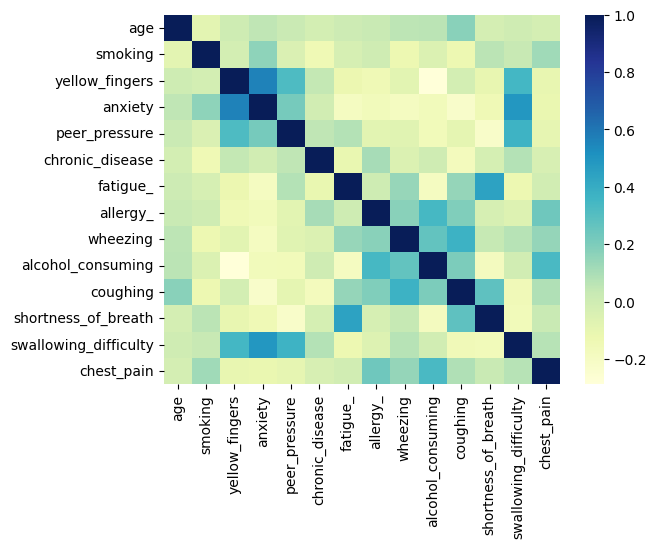

In [20]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

###Transforming the target column the dataset into categorical form

In [21]:
data['lung_cancer'].replace({'YES':1,'NO':0},inplace=True)

###Revmoving the object column and target columns from the main dataframe and loading a separate dataframe which contains the target value

In [22]:
X = data.drop(columns=['gender','lung_cancer'],axis=1)

y = data['lung_cancer']
#keeping the 'lung_cancer' as target column

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

##Performing KNN Algorithm

[0.8817204301075269, 0.8709677419354839, 0.9032258064516129, 0.9032258064516129, 0.8817204301075269, 0.8709677419354839, 0.8817204301075269, 0.8817204301075269, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8709677419354839]


Text(0, 0.5, 'Accuracy Score')

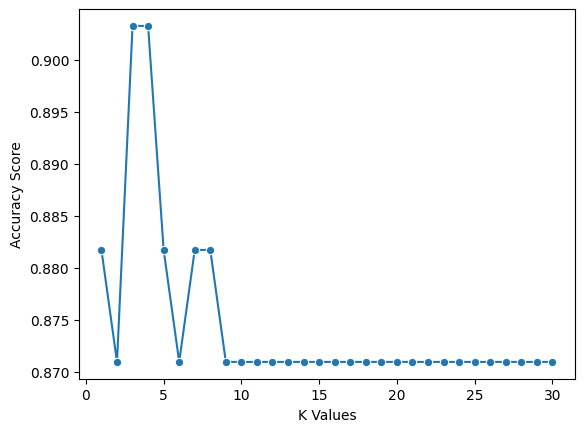

In [24]:
k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

print(scores)

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

We see that acuuracy is 1 till neighbor is 7. But we know that in ml an accuracy 1 may mean that our model is overfit. Thus we use n_neighbors=8 to train our model.

In [25]:
knn = KNeighborsClassifier(n_neighbors=8,metric="minkowski")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 88.172%


In [26]:
knn = KNeighborsClassifier(n_neighbors=8,metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 87.097%


In [27]:
knn = KNeighborsClassifier(n_neighbors=8,metric="euclidean")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 88.172%


#Distance Measure

In [29]:
data1 = data.drop(columns=['gender'],axis=1)
data1=data1.head(10)

##Euclidean Distance Measure

In [30]:
import math

def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

def calculate_distances_euclidean(dataset):
    distances = []
    for i in range(len(dataset)):
        for j in range(i + 1, len(dataset)):
            distance = euclidean_distance(dataset.iloc[i], dataset.iloc[j])
            distances.append((i, j, distance))
    return distances

distances = calculate_distances_euclidean(data1)
for i, j, distance in distances:
   print(f"The Euclidean distance between sample {i+1} and sample {j+1} is {distance:.2f}")

The Euclidean distance between sample 1 and sample 2 is 5.74
The Euclidean distance between sample 1 and sample 3 is 10.30
The Euclidean distance between sample 1 and sample 4 is 6.48
The Euclidean distance between sample 1 and sample 5 is 6.48
The Euclidean distance between sample 1 and sample 6 is 6.48
The Euclidean distance between sample 1 and sample 7 is 17.12
The Euclidean distance between sample 1 and sample 8 is 18.19
The Euclidean distance between sample 1 and sample 9 is 3.16
The Euclidean distance between sample 1 and sample 10 is 16.25
The Euclidean distance between sample 2 and sample 3 is 15.26
The Euclidean distance between sample 2 and sample 4 is 11.36
The Euclidean distance between sample 2 and sample 5 is 11.45
The Euclidean distance between sample 2 and sample 6 is 2.65
The Euclidean distance between sample 2 and sample 7 is 22.14
The Euclidean distance between sample 2 and sample 8 is 23.11
The Euclidean distance between sample 2 and sample 9 is 6.56
The Euclidean 

##Manhattan Distance Measure

In [31]:
def manhattan_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += abs(point1[i] - point2[i])
    return distance

def calculate_distances_manhattan(dataset):
    distances = []
    for i in range(len(dataset)):
        for j in range(i + 1, len(dataset)):
            distance = manhattan_distance(dataset.iloc[i], dataset.iloc[j])
            distances.append((i, j, distance))
    return distances

distances = calculate_distances_manhattan(data1)
for i, j, distance in distances:
   print(f"The Manhattan distance between sample {i+1} and sample {j+1} is {distance:.2f}")

The Manhattan distance between sample 1 and sample 2 is 13.00
The Manhattan distance between sample 1 and sample 3 is 16.00
The Manhattan distance between sample 1 and sample 4 is 12.00
The Manhattan distance between sample 1 and sample 5 is 12.00
The Manhattan distance between sample 1 and sample 6 is 12.00
The Manhattan distance between sample 1 and sample 7 is 21.00
The Manhattan distance between sample 1 and sample 8 is 25.00
The Manhattan distance between sample 1 and sample 9 is 10.00
The Manhattan distance between sample 1 and sample 10 is 24.00
The Manhattan distance between sample 2 and sample 3 is 23.00
The Manhattan distance between sample 2 and sample 4 is 19.00
The Manhattan distance between sample 2 and sample 5 is 21.00
The Manhattan distance between sample 2 and sample 6 is 7.00
The Manhattan distance between sample 2 and sample 7 is 28.00
The Manhattan distance between sample 2 and sample 8 is 28.00
The Manhattan distance between sample 2 and sample 9 is 13.00
The Manh

##Minkowski Dustance Measure

In [32]:
def minkowski_distance(point1, point2, p):
    distance = 0
    for i in range(len(point1)):
        distance += abs(point1[i] - point2[i]) ** p
    return distance ** (1 / p)

def calculate_distances_minkowski(dataset, p):
    distances = []
    for i in range(len(dataset)):
        for j in range(i + 1, len(dataset)):
            distance = minkowski_distance(dataset.iloc[i], dataset.iloc[j], p)
            distances.append((i, j, distance))
    return distances

p = 3  # Minkowski distance parameter, replace with the desired value
distances = calculate_distances_minkowski(data1,p)
for i, j, distance in distances:
   print(f"The Minkowski distance between sample {i+1} and sample {j+1} is {distance:.2f}")

The Minkowski distance between sample 1 and sample 2 is 5.10
The Minkowski distance between sample 1 and sample 3 is 10.02
The Minkowski distance between sample 1 and sample 4 is 6.06
The Minkowski distance between sample 1 and sample 5 is 6.06
The Minkowski distance between sample 1 and sample 6 is 6.06
The Minkowski distance between sample 1 and sample 7 is 17.00
The Minkowski distance between sample 1 and sample 8 is 18.01
The Minkowski distance between sample 1 and sample 9 is 2.15
The Minkowski distance between sample 1 and sample 10 is 16.01
The Minkowski distance between sample 2 and sample 3 is 15.01
The Minkowski distance between sample 2 and sample 4 is 11.02
The Minkowski distance between sample 2 and sample 5 is 11.03
The Minkowski distance between sample 2 and sample 6 is 1.91
The Minkowski distance between sample 2 and sample 7 is 22.00
The Minkowski distance between sample 2 and sample 8 is 23.00
The Minkowski distance between sample 2 and sample 9 is 6.06
The Minkowski 